In [13]:
import pandas as pd
retail=pd.read_csv("global_super_store.csv",encoding = "ISO-8859-1")
retail.head()

,Row-ID,Order-ID,Order-Date,Ship-Date,Ship-Mode,Customer-ID,Customer-Name,Segment,City,State,...,Product-ID,Category,Sub-Category,Product-Name,Sales,Quantity,Discount,Profit,Shipping-Cost,Order-Priority
0,32298,CA-2012-124891,July-31-2012,31-07-2012,Same-Day,RH-19495,Rick-Hansen,Consumer,New-York-City,New-York,...,TEC-AC-10003033,Technology,Accessories,Plantronics-CS510---Over-the-Head-monaural-Wir...,2309.650,7,0.0,762.1845,933.57,Critical
1,26341,IN-2013-77878,February-5-2013,07-02-2013,Second-Class,JR-16210,Justin-Ritter,Corporate,Wollongong,New-South-Wales,...,FUR-CH-10003950,Furniture,Chairs,Novimex-Executive-Leather-Armchair-Black,3709.395,9,0.1,-288.7650,923.63,Critical
2,25330,IN-2013-71249,October-17-2013,18-10-2013,First-Class,CR-12730,Craig-Reiter,Consumer,Brisbane,Queensland,...,TEC-PH-10004664,Technology,Phones,Nokia-Smart-Phone-with-Caller-ID,5175.171,9,0.1,919.9710,915.49,Medium
3,13524,ES-2013-1579342,January-28-2013,30-01-2013,First-Class,KM-16375,Katherine-Murray,Home-Office,Berlin,Berlin,...,TEC-PH-10004583,Technology,Phones,Motorola-Smart-Phone-Cordless,2892.510,5,0.1,-96.5400,910.16,Medium
4,47221,SG-2013-4320,November-5-2013,06-11-2013,Same-Day,RH-9495,Rick-Hansen,Consumer,Dakar,Dakar,...,TEC-SHA-10000501,Technology,Copiers,Sharp-Wireless-Fax-High-Speed,2832.960,8,0.0,311.5200,903.04,Critical


In [14]:
retail.columns

Index(['Row-ID', 'Order-ID', 'Order-Date', 'Ship-Date', 'Ship-Mode',
       'Customer-ID', 'Customer-Name', 'Segment', 'City', 'State', 'Country',
       'Postal-Code', 'Market', 'Region', 'Product-ID', 'Category',
       'Sub-Category', 'Product-Name', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Shipping-Cost', 'Order-Priority'],
      dtype='object')

In [16]:
retail=retail.drop(['Row-ID','Postal-Code', 'Market','Quantity'], axis=1)
retail.head(2)

,Order-ID,Order-Date,Ship-Date,Ship-Mode,Customer-ID,Customer-Name,Segment,City,State,Country,Region,Product-ID,Category,Sub-Category,Product-Name,Sales,Discount,Profit,Shipping-Cost,Order-Priority
0,CA-2012-124891,July-31-2012,31-07-2012,Same-Day,RH-19495,Rick-Hansen,Consumer,New-York-City,New-York,United-States,East,TEC-AC-10003033,Technology,Accessories,Plantronics-CS510---Over-the-Head-monaural-Wir...,2309.650,0.0,762.1845,933.57,Critical
1,IN-2013-77878,February-5-2013,07-02-2013,Second-Class,JR-16210,Justin-Ritter,Corporate,Wollongong,New-South-Wales,Australia,Oceania,FUR-CH-10003950,Furniture,Chairs,Novimex-Executive-Leather-Armchair-Black,3709.395,0.1,-288.7650,923.63,Critical


# Data PreProcessing


In [17]:
#Parse date
retail['Order-Date'] = pd.to_datetime(retail['Order-Date'], format = "%B-%d-%Y")
retail.head()

,Order-ID,Order-Date,Ship-Date,Ship-Mode,Customer-ID,Customer-Name,Segment,City,State,Country,Region,Product-ID,Category,Sub-Category,Product-Name,Sales,Discount,Profit,Shipping-Cost,Order-Priority
0,CA-2012-124891,2012-07-31,31-07-2012,Same-Day,RH-19495,Rick-Hansen,Consumer,New-York-City,New-York,United-States,East,TEC-AC-10003033,Technology,Accessories,Plantronics-CS510---Over-the-Head-monaural-Wir...,2309.650,0.0,762.1845,933.57,Critical
1,IN-2013-77878,2013-02-05,07-02-2013,Second-Class,JR-16210,Justin-Ritter,Corporate,Wollongong,New-South-Wales,Australia,Oceania,FUR-CH-10003950,Furniture,Chairs,Novimex-Executive-Leather-Armchair-Black,3709.395,0.1,-288.7650,923.63,Critical
2,IN-2013-71249,2013-10-17,18-10-2013,First-Class,CR-12730,Craig-Reiter,Consumer,Brisbane,Queensland,Australia,Oceania,TEC-PH-10004664,Technology,Phones,Nokia-Smart-Phone-with-Caller-ID,5175.171,0.1,919.9710,915.49,Medium
3,ES-2013-1579342,2013-01-28,30-01-2013,First-Class,KM-16375,Katherine-Murray,Home-Office,Berlin,Berlin,Germany,Central,TEC-PH-10004583,Technology,Phones,Motorola-Smart-Phone-Cordless,2892.510,0.1,-96.5400,910.16,Medium
4,SG-2013-4320,2013-11-05,06-11-2013,Same-Day,RH-9495,Rick-Hansen,Consumer,Dakar,Dakar,Senegal,Africa,TEC-SHA-10000501,Technology,Copiers,Sharp-Wireless-Fax-High-Speed,2832.960,0.0,311.5200,903.04,Critical


In [18]:
#Data quality check and cleaning
#Na handling
retail.isnull().sum()

Order-ID          0
Order-Date        0
Ship-Date         0
Ship-Mode         0
Customer-ID       0
Customer-Name     0
Segment           0
City              0
State             0
Country           0
Region            0
Product-ID        0
Category          0
Sub-Category      0
Product-Name      0
Sales             0
Discount          0
Profit            0
Shipping-Cost     0
Order-Priority    0
dtype: int64

# Extracting R (Recency), F (Frequency), M (Monetary) columns form the data.

In [21]:
# Monetary Function

# Finding total amount spent per customer
monetary = retail.groupby("Customer-ID").Sales.sum()
monetary = monetary.reset_index()
monetary.head()

,Customer-ID,Sales
0,AA-10315,13747.41300
1,AA-10375,5884.19500
2,AA-10480,17695.58978
3,AA-10645,15343.89070
4,AA-315,2243.25600


In [23]:
#Frequency function

# Getting the count of orders made by each customer based on customer ID.
frequency = retail.groupby("Customer-ID")['Order-ID'].count()
frequency = frequency.reset_index()
frequency.head()

,Customer-ID,Order-ID
0,AA-10315,42
1,AA-10375,42
2,AA-10480,38
3,AA-10645,73
4,AA-315,8


In [24]:
#Merging Sales and Frequency Columns
#Creating master dataset

master = monetary.merge(frequency , on ='Customer-ID' ,how = 'inner')
master.head()

,Customer-ID,Sales,Order-ID
0,AA-10315,13747.41300,42
1,AA-10375,5884.19500,42
2,AA-10480,17695.58978,38
3,AA-10645,15343.89070,73
4,AA-315,2243.25600,8


In [25]:
#Recency Value
maximum =max(retail['Order-Date'])
maximum

Timestamp('2014-12-31 00:00:00')

In [26]:
# Adding one more day to the max data, so that the max date will have 1 as the difference and not zero.
maximum = maximum + pd.DateOffset(days = 1)

In [27]:
retail['diff'] = maximum - retail['Order-Date']
retail.head()

,Order-ID,Order-Date,Ship-Date,Ship-Mode,Customer-ID,Customer-Name,Segment,City,State,Country,...,Product-ID,Category,Sub-Category,Product-Name,Sales,Discount,Profit,Shipping-Cost,Order-Priority,diff
0,CA-2012-124891,2012-07-31,31-07-2012,Same-Day,RH-19495,Rick-Hansen,Consumer,New-York-City,New-York,United-States,...,TEC-AC-10003033,Technology,Accessories,Plantronics-CS510---Over-the-Head-monaural-Wir...,2309.650,0.0,762.1845,933.57,Critical,884 days
1,IN-2013-77878,2013-02-05,07-02-2013,Second-Class,JR-16210,Justin-Ritter,Corporate,Wollongong,New-South-Wales,Australia,...,FUR-CH-10003950,Furniture,Chairs,Novimex-Executive-Leather-Armchair-Black,3709.395,0.1,-288.7650,923.63,Critical,695 days
2,IN-2013-71249,2013-10-17,18-10-2013,First-Class,CR-12730,Craig-Reiter,Consumer,Brisbane,Queensland,Australia,...,TEC-PH-10004664,Technology,Phones,Nokia-Smart-Phone-with-Caller-ID,5175.171,0.1,919.9710,915.49,Medium,441 days
3,ES-2013-1579342,2013-01-28,30-01-2013,First-Class,KM-16375,Katherine-Murray,Home-Office,Berlin,Berlin,Germany,...,TEC-PH-10004583,Technology,Phones,Motorola-Smart-Phone-Cordless,2892.510,0.1,-96.5400,910.16,Medium,703 days
4,SG-2013-4320,2013-11-05,06-11-2013,Same-Day,RH-9495,Rick-Hansen,Consumer,Dakar,Dakar,Senegal,...,TEC-SHA-10000501,Technology,Copiers,Sharp-Wireless-Fax-High-Speed,2832.960,0.0,311.5200,903.04,Critical,422 days


In [29]:
#Dataframe merging by recency

recency = retail.groupby('Customer-ID')['diff'].min()
recency =recency.reset_index()
recency.head()

,Customer-ID,diff
0,AA-10315,9 days
1,AA-10375,7 days
2,AA-10480,126 days
3,AA-10645,29 days
4,AA-315,3 days


# RFM combined DataFrame

In [30]:
RFM = master.merge(recency, on = "Customer-ID")
RFM.columns = ['Customer-ID','Sales','Frequency','Recency']
RFM.head()

,Customer-ID,Sales,Frequency,Recency
0,AA-10315,13747.41300,42,9 days
1,AA-10375,5884.19500,42,7 days
2,AA-10480,17695.58978,38,126 days
3,AA-10645,15343.89070,73,29 days
4,AA-315,2243.25600,8,3 days


In [31]:
RFM.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1590 entries, 0 to 1589
Data columns (total 4 columns):
Customer-ID    1590 non-null object
Sales          1590 non-null float64
Frequency      1590 non-null int64
Recency        1590 non-null timedelta64[ns]
dtypes: float64(1), int64(1), object(1), timedelta64[ns](1)
memory usage: 62.1+ KB


# Outlier Treatment

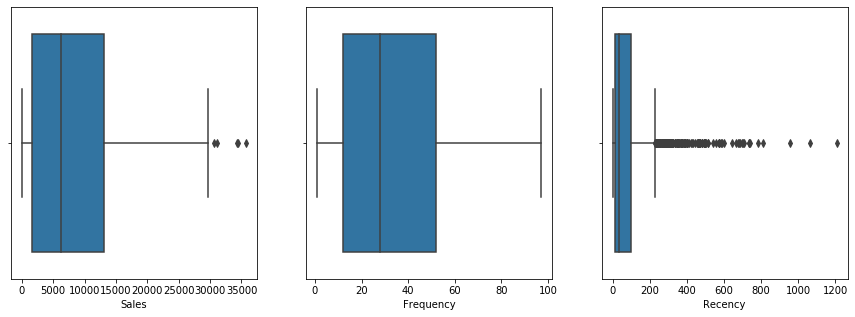

In [33]:
# outlier treatment for Sales
import matplotlib.pyplot as plt
import seaborn as sns

fig, axs = plt.subplots(1,3, figsize = (15,5))

sns.boxplot(RFM.Sales, ax = axs[0])
sns.boxplot(RFM.Frequency, ax = axs[1])
sns.boxplot(RFM.Recency.dt.days, ax = axs[2])

plt.tight_layout
plt.show()

In [35]:
#Outlier Treatment
Q1 = RFM.Sales.quantile(0.25)
Q3 = RFM.Sales.quantile(0.75)
IQR = Q3 - Q1
RFM = RFM[(RFM.Sales >= Q1 - 1.5*IQR) & (RFM.Sales <= Q3 + 1.5*IQR)]

In [36]:
# outlier treatment for Recency
Q1 = RFM.Recency.quantile(0.25)
Q3 = RFM.Recency.quantile(0.75)
IQR = Q3 - Q1
RFM = RFM[(RFM.Recency >= Q1 - 1.5*IQR) & (RFM.Recency <= Q3 + 1.5*IQR)]

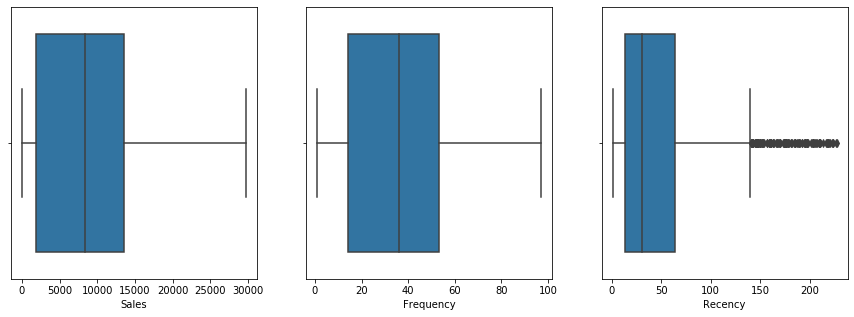

In [38]:
fig, axs = plt.subplots(1,3, figsize = (15,5))

sns.boxplot(RFM.Sales, ax = axs[0])
sns.boxplot(RFM.Frequency, ax = axs[1])
sns.boxplot(RFM.Recency.dt.days, ax = axs[2])

plt.tight_layout
plt.show()

In [39]:
RFM.head()

,Customer-ID,Sales,Frequency,Recency
0,AA-10315,13747.41300,42,9 days
1,AA-10375,5884.19500,42,7 days
2,AA-10480,17695.58978,38,126 days
3,AA-10645,15343.89070,73,29 days
4,AA-315,2243.25600,8,3 days


In [43]:
# standardise all parameters
RFM_norm1 = RFM.drop("Customer-ID", axis=1)
RFM_norm1.Recency = RFM_norm1.Recency.dt.days

In [44]:
#Scaling the RFM data
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()
RFM_norm1 = standard_scaler.fit_transform(RFM_norm1)

In [45]:
RFM_norm1 = pd.DataFrame(RFM_norm1)
RFM_norm1.head()

,0,1,2
0,0.759750,0.337845,-0.792768
1,-0.394740,0.337845,-0.831595
2,1.339428,0.152082,1.478592
3,0.994148,1.777503,-0.404501
4,-0.929308,-1.241135,-0.909248


In [46]:
RFM_norm1.columns = ['Sales','Frequency','Recency']
RFM_norm1.head()

,Sales,Frequency,Recency
0,0.759750,0.337845,-0.792768
1,-0.394740,0.337845,-0.831595
2,1.339428,0.152082,1.478592
3,0.994148,1.777503,-0.404501
4,-0.929308,-1.241135,-0.909248


# Hopkins Statistics:
The Hopkins statistic, is a statistic which gives a value which indicates the cluster tendency, in other words: how well the data can be clustered.

If the value is between {0.01, ...,0.3}, the data is regularly spaced.

If the value is around 0.5, it is random.

If the value is between {0.7, ..., 0.99}, it has a high tendency to cluster.

In [47]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [48]:
hopkins(RFM_norm1)

0.9061983929558818

Silhouette Analysis

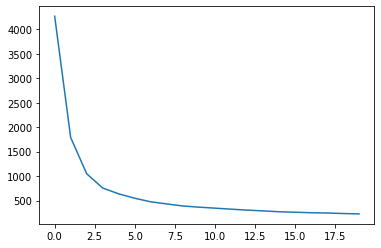

In [52]:
# sum of squared distances
ssd = []
for num_clusters in list(range(1,21)):
    model_clus = KMeans(n_clusters = num_clusters, max_iter=100)
    model_clus.fit(RFM_norm1)
    ssd.append(model_clus.inertia_)

plt.plot(ssd)

In [53]:
# Kmeans with K=5
model_clus5 = KMeans(n_clusters = 5, max_iter=50)
model_clus5.fit(RFM_norm1)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [54]:
RFM.head()

,Customer-ID,Sales,Frequency,Recency
0,AA-10315,13747.41300,42,9 days
1,AA-10375,5884.19500,42,7 days
2,AA-10480,17695.58978,38,126 days
3,AA-10645,15343.89070,73,29 days
4,AA-315,2243.25600,8,3 days


In [55]:
# analysis of clusters formed
RFM.index = pd.RangeIndex(len(RFM.index))
RFM_km = pd.concat([RFM, pd.Series(model_clus5.labels_)], axis=1)
RFM_km.columns = ['CustomerID', 'Amount', 'Frequency', 'Recency', 'ClusterID']
RFM_km.head()

,CustomerID,Amount,Frequency,Recency,ClusterID
0,AA-10315,13747.41300,42,9 days,3
1,AA-10375,5884.19500,42,7 days,3
2,AA-10480,17695.58978,38,126 days,3
3,AA-10645,15343.89070,73,29 days,0
4,AA-315,2243.25600,8,3 days,2


In [56]:
RFM_km.Recency = RFM_km.Recency.dt.days
km_clusters_amount = pd.DataFrame(RFM_km.groupby(["ClusterID"]).Amount.mean())
km_clusters_frequency = pd.DataFrame(RFM_km.groupby(["ClusterID"]).Frequency.mean())
km_clusters_recency = pd.DataFrame(RFM_km.groupby(["ClusterID"]).Recency.mean())

In [57]:
df = pd.concat([pd.Series([0,1,2,3,4]), km_clusters_amount, km_clusters_frequency, km_clusters_recency], axis=1)
df.columns = ["ClusterID", "Amount_mean", "Frequency_mean", "Recency_mean"]
df.head()

,ClusterID,Amount_mean,Frequency_mean,Recency_mean
0,0,18469.301460,62.982759,25.717241
1,1,2604.530815,14.555556,111.148148
2,2,2405.040160,14.628947,28.871053
3,3,11271.180278,46.464516,28.305376
4,4,1976.501113,12.454545,185.040404


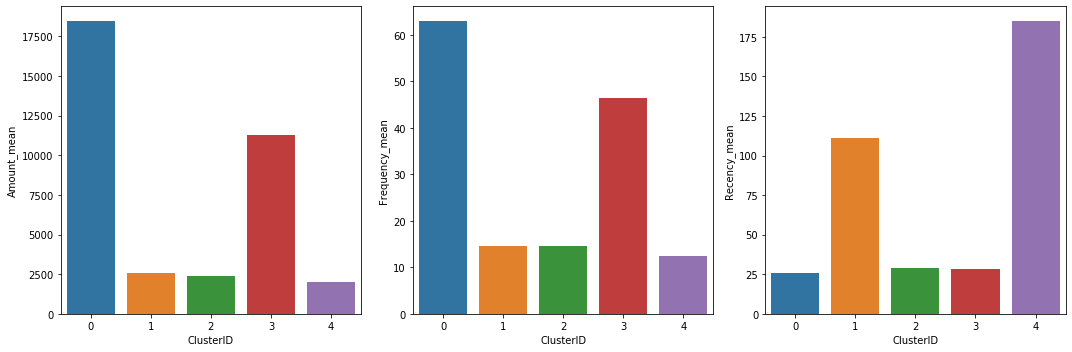

In [58]:
fig, axs = plt.subplots(1,3, figsize = (15,5))

sns.barplot(x=df.ClusterID, y=df.Amount_mean, ax = axs[0])
sns.barplot(x=df.ClusterID, y=df.Frequency_mean, ax = axs[1])
sns.barplot(x=df.ClusterID, y=df.Recency_mean, ax = axs[2])
plt.tight_layout()            
plt.show()

# Inferences
On RFM analysis it was found that Customers with Cluster ID 2 are the best and loyal customers.
People with cluster ID 0,1,3,4 needs targeted marketing marketing based on their demographics, buying pattern etc.